In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, LayerNormalization, ReLU, MaxPooling2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load your data

# Load the arrays back from the .npz file
loaded = np.load('/content/drive/MyDrive/project/arrays_soh.npz')
data = loaded['array1']
target = loaded['array2']

In [ ]:

# Load the arrays back from the .npz file
loaded1 = np.load('/content/drive/MyDrive/project/arraysVald_soh.npz')
data_vald = loaded1['array1']
target_vald = loaded1['array2']

In [ ]:
result_array = np.concatenate((data, data_vald), axis=3)

In [ ]:
result_target = np.concatenate((target, target_vald), axis=0)

In [ ]:
result_array.shape

(30, 30, 3, 87487)

In [ ]:
result_target.shape

(87487,)

In [ ]:
# Transpose the data to have shape (7703, 30, 30, 3)
data = np.transpose(result_array, (3, 0, 1, 2))

In [ ]:
data.shape

(87487, 30, 30, 3)

In [ ]:
result_target.shape

(87487,)

In [ ]:

# Define the CNN model
input_layer = Input(shape=(30, 30, 3))
x = Conv2D(8, (3, 3), padding='same')(input_layer)
x = LayerNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LayerNormalization()(x)
x = ReLU()(x)
x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LayerNormalization()(x)
x = ReLU()(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LayerNormalization()(x)
x = ReLU()(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LayerNormalization()(x)
x = ReLU()(x)
x = Flatten()(x)
x = Dense(1)(x)
#x=ReLU()(x)

model = Model(inputs=input_layer, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 layer_normalization (Layer  (None, 30, 30, 8)         16        
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 30, 30, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 16)        1168  

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

In [ ]:
# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data,result_target, test_size=0.2, random_state=42)

In [ ]:
val_data.shape

(17498, 30, 30, 3)

In [ ]:
train_data.shape

(69989, 30, 30, 3)

In [ ]:
# Train the model
history = model.fit(
    train_data, train_labels,
    epochs=100,
    batch_size=256,
    validation_data=(val_data, val_labels),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/100
273/274 [============================>.] - ETA: 0s - loss: 0.0720 - root_mean_squared_error: 0.1579 - mean_absolute_error: 0.0720
Epoch 1: val_loss improved from inf to 0.04304, saving model to best_model.h5
274/274 [==============================] - 20s 64ms/step - loss: 0.0720 - root_mean_squared_error: 0.1578 - mean_absolute_error: 0.0720 - val_loss: 0.0430 - val_root_mean_squared_error: 0.0531 - val_mean_absolute_error: 0.0430
Epoch 2/100
  2/274 [..............................] - ETA: 15s - loss: 0.0433 - root_mean_squared_error: 0.0582 - mean_absolute_error: 0.0433

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - ETA: 0s - loss: 0.0444 - root_mean_squared_error: 0.0599 - mean_absolute_error: 0.0444
Epoch 2: val_loss improved from 0.04304 to 0.03396, saving model to best_model.h5
274/274 [==============================] - 15s 56ms/step - loss: 0.0444 - root_mean_squared_error: 0.0599 - mean_absolute_error: 0.0444 - val_loss: 0.0340 - val_root_mean_squared_error: 0.0503 - val_mean_absolute_error: 0.0340
Epoch 3/100
273/274 [============================>.] - ETA: 0s - loss: 0.0582 - root_mean_squared_error: 0.0777 - mean_absolute_error: 0.0582
Epoch 3: val_loss did not improve from 0.03396
274/274 [==============================] - 15s 56ms/step - loss: 0.0582 - root_mean_squared_error: 0.0777 - mean_absolute_error: 0.0582 - val_loss: 0.0351 - val_root_mean_squared_error: 0.0470 - val_mean_absolute_error: 0.0351
Epoch 4/100
273/274 [============================>.] - ETA: 0s - loss: 0.0477 - root_mean_squared_error: 0.0644 - mean_absolute_error: 0.0477
Epo

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
y_hat = model.predict(val_data)

547/547 [==============================] - 5s 9ms/step


In [ ]:
y = val_labels

In [ ]:
y_hat.shape

(17498, 1)

In [ ]:
y.shape

(17498,)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y,y_hat))
print("RMSE:", rmse)

RMSE: 0.005992950827680289


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y,y_hat)
print("MAE:", f'{mae*100}%')

MAE: 0.4698970683405688%


In [ ]:
y_tarin = model.predict(train_data)

2188/2188 [==============================] - 21s 9ms/step


In [ ]:
yy = train_labels

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(yy,y_tarin))
print("RMSE:", rmse)

RMSE: 0.006399890646223248


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(yy,y_tarin)
print("MAE:", f'{mae*100}%')

MAE: 0.6843240570734159%


In [ ]:
y

array([0.89484209, 0.93383164, 0.81389065, ..., 0.89583516, 0.95256436,
       0.87404809])

In [ ]:
y_hat

array([[0.8957976 ],
       [0.9349352 ],
       [0.81530136],
       ...,
       [0.8866178 ],
       [0.9483119 ],
       [0.87936395]], dtype=float32)

547/547 [==============================] - 5s 9ms/step


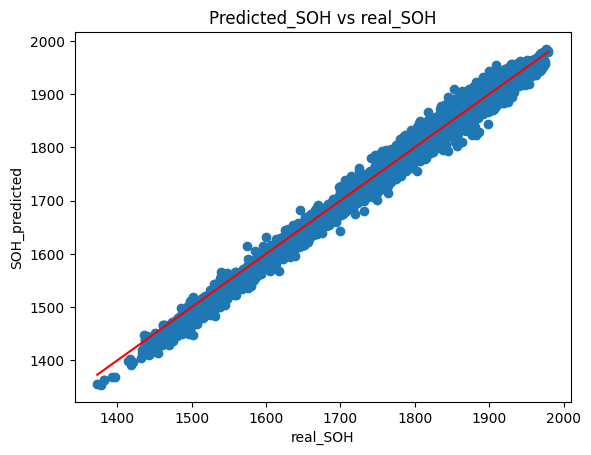

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the trained model named 'battery_net' and testData available

# Use the trained model to predict the remaining cycle life for testData
y_pred_test = model.predict(val_data) * 2000

# Rescale the testRulData to the original RUL range
test_rul_scaled = val_labels * 2000

# Compare the actual cycle life with the predicted cycle life using a scatter plot
plt.figure()
plt.scatter(test_rul_scaled, y_pred_test)
plt.plot([min(test_rul_scaled), max(test_rul_scaled)], [min(test_rul_scaled), max(test_rul_scaled)], color='red')
plt.title("Predicted_SOH vs real_SOH")
plt.xlabel("real_SOH")
plt.ylabel("SOH_predicted")
plt.show()


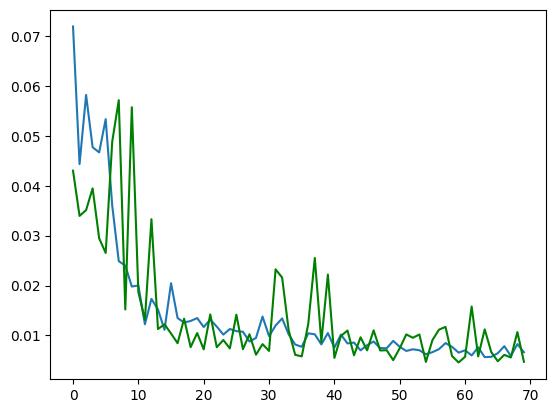

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color = 'green')

In [ ]:
history.history['loss']

[0.07196442782878876,
 0.044352274388074875,
 0.0582268051803112,
 0.04773521423339844,
 0.04670800268650055,
 0.05337075516581535,
 0.03603142127394676,
 0.024875544011592865,
 0.023998018354177475,
 0.019798120483756065,
 0.019994094967842102,
 0.012226101011037827,
 0.01731172390282154,
 0.015196788124740124,
 0.011112932115793228,
 0.020455941557884216,
 0.01347403135150671,
 0.012574657797813416,
 0.012886909767985344,
 0.013466591946780682,
 0.011669624596834183,
 0.013171079568564892,
 0.01175458263605833,
 0.010154691524803638,
 0.011270553804934025,
 0.010841643437743187,
 0.0107218436896801,
 0.008763707242906094,
 0.009484415873885155,
 0.013776210136711597,
 0.009842145256698132,
 0.011966821737587452,
 0.01339578628540039,
 0.0101857278496027,
 0.008153736591339111,
 0.007706647738814354,
 0.010402591899037361,
 0.010210095904767513,
 0.00818854570388794,
 0.0104643814265728,
 0.007542415522038937,
 0.010147592052817345,
 0.00837608240544796,
 0.008549386635422707,
 0.0069

In [ ]:
# Assuming 'model' is your trained model
model_path = '/content/drive/MyDrive/project/model_soh.h5'
model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model to Google Drive
model_save_path = '/content/drive/MyDrive/project/my_cnn_model_soh.keras'
model.save(model_save_path)


In [ ]:
# Load the model from Google Drive
loaded_model = tf.keras.models.load_model(model_save_path)

# # Verify the model by making a prediction
# x_test = tf.random.normal([10, 28, 28, 1])
# predictions = loaded_model.predict(x_test)
# print(predictions)


In [ ]:
## load test data

# Load the arrays back from the .npz file
loaded2 = np.load('/content/drive/MyDrive/project/soh_test.npz')
data_test = loaded2['array1']
target_test = loaded2['array2']

In [ ]:
data_test.shape

(30, 30, 3, 812)

In [ ]:
# Transpose the data to have shape (7703, 30, 30, 3)
data_test = np.transpose(data_test, (3, 0, 1, 2))

In [ ]:
y_hat = loaded_model.predict(data_test)

26/26 [==============================] - 0s 10ms/step


In [ ]:
y = target_test

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y,y_hat))
print("RMSE:", rmse)

RMSE: 0.004455717632345041


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y,y_hat)
print("MAE:", f'{mae*100}%')

MAE: 0.34972990660946385%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

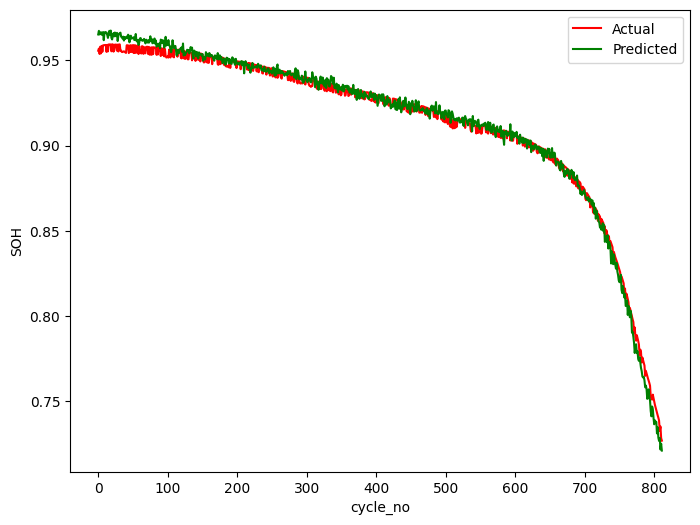

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, label='Actual',color = "red")
ax.plot(y_hat, color='green', label='Predicted')
ax.set_xlabel("cycle_no")
ax.set_ylabel("SOH")
ax.legend()

plt.show()


In [ ]:
y.shape

(842,)

In [ ]:
loaded_model.loss

'mae'